Basic example of autoencoder. See [here](https://blog.keras.io/building-autoencoders-in-keras.html) for more sophisticated examples.

In [1]:
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.cross_validation import train_test_split

from keras.layers import Dense, Input
from keras.models import Model

import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


# Data

In [2]:
X, y = make_blobs(n_samples=2000, n_features=100, centers=2, random_state=42)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Autoencoder

In [4]:
inp = Input(shape=(X.shape[1],))
enc = Dense(units=50, activation="relu")(inp)
hid = Dense(units=10, activation="relu")(enc)
dec = Dense(units=50, activation="relu")(hid)
out = Dense(units=X.shape[1], activation="linear")(dec)

In [5]:
autoencoder = Model(inputs=[inp], outputs=[out])
autoencoder.compile(loss="mse", optimizer="adam")
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_3 (Dense)              (None, 50)                550       
_________________________________________________________________
dense_4 (Dense)              (None, 100)               5100      
Total params: 11,210
Trainable params: 11,210
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = autoencoder.fit(X_train, X_train, epochs=150, validation_data=(X_test, X_test), verbose=0)

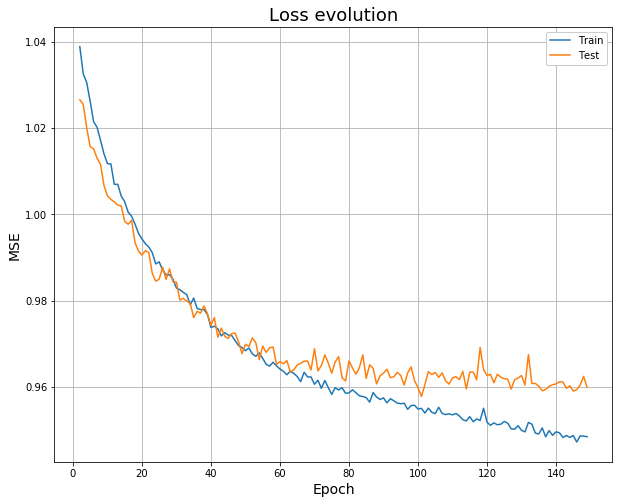

In [7]:
plt.figure(figsize=(10, 8))
plt.plot(np.arange(2, 150), history.history["loss"][2:], label="Train")
plt.plot(np.arange(2, 150), history.history["val_loss"][2:], label="Test")
plt.legend(frameon=True, framealpha=1)
plt.grid("on")
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("MSE", fontsize=14)
plt.title("Loss evolution", fontsize=18);

## Encoder part

In [8]:
encoder = Model(inputs=[inp], outputs=[hid])

In [9]:
encoded_test = encoder.predict(X_test)

In [10]:
encoded_test.shape

(400, 10)

## Decoder part

In [11]:
encoded_inp = Input(shape=(10,))
decoder_out = autoencoder.layers[-1](autoencoder.layers[-2](encoded_inp))

In [12]:
decoder = Model(inputs=[encoded_inp], outputs=[decoder_out])

In [13]:
decoder_test = decoder.predict(encoded_test)

In [14]:
decoder_test.shape

(400, 100)